In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
'''
sns.heatmap(train[['Age',	'RoomService',	'FoodCourt',	'ShoppingMall', 'Spa',
                   'VRDeck']])
'''

"\nsns.heatmap(train[['Age',\t'RoomService',\t'FoodCourt',\t'ShoppingMall', 'Spa',\n                   'VRDeck']])\n"

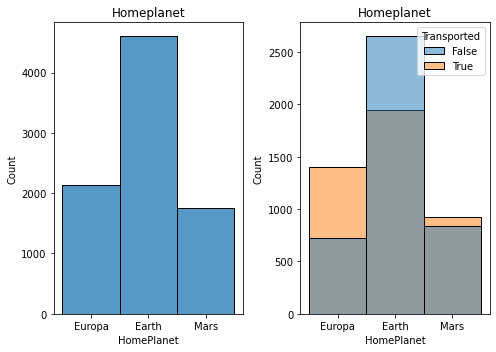

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

sns.histplot(x='HomePlanet', data=train, ax=axs[0])
axs[0].set_title('Homeplanet')

sns.histplot(x='HomePlanet', data=train, hue='Transported', ax=axs[1])
axs[1].set_title('Homeplanet')

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Transported', ylabel='count'>

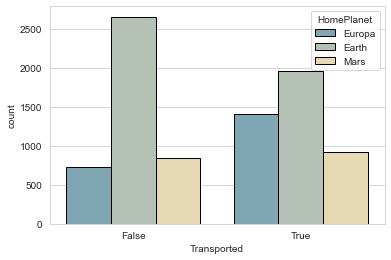

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='HomePlanet', data=train,
              palette='blend:#7AB,#EDA', edgecolor="black")

<AxesSubplot:xlabel='Transported', ylabel='count'>

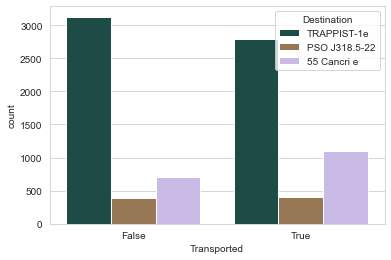

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='Destination', data=train,palette='cubehelix')

In [13]:
'''
sns.set()
sns.pairplot(train[['Age',	'RoomService',	'FoodCourt',	'ShoppingMall', 'Spa',
                   'VRDeck']], size = 2.5)
plt.show();
'''

"\nsns.set()\nsns.pairplot(train[['Age',\t'RoomService',\t'FoodCourt',\t'ShoppingMall', 'Spa',\n                   'VRDeck']], size = 2.5)\nplt.show();\n"

In [14]:
print(f'Raw data= {len(train)}, \nData without nan = {len(train.dropna())}')

Raw data= 8693, 
Data without nan = 6606


In [15]:
columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
           'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

unique_values = {}
for column in columns:
    unique_values[column] = len(train[column].unique())

print(unique_values)


{'HomePlanet': 4, 'CryoSleep': 3, 'Cabin': 6561, 'Destination': 4, 'VIP': 3, 'RoomService': 1274, 'FoodCourt': 1508, 'ShoppingMall': 1116, 'Spa': 1328, 'VRDeck': 1307, 'Transported': 2}


In [16]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [17]:
len(train.RoomService.unique())

1274

In [18]:
'''c = train.drop('PassengerId', axis=1).groupby(['RoomService']).agg(['unique'])
print(c)
'''

"c = train.drop('PassengerId', axis=1).groupby(['RoomService']).agg(['unique'])\nprint(c)\n"

In [19]:
train.isnull()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

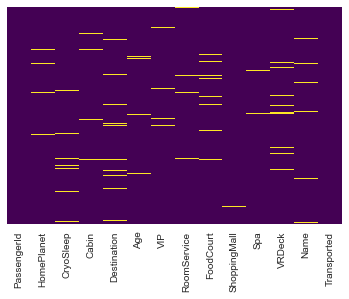

In [20]:
# Visualising missing data
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [21]:
# Dropping the columns with too many missing values which cannot be reasonably imputed or
# Don't have any apparent analytical usefulness

drop_col_names = ['PassengerId', 'Cabin', 'VIP', 'FoodCourt', 'Spa', 'VRDeck', 'Name']

In [22]:
train_data = train.drop(drop_col_names, axis=1)

train_data.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,ShoppingMall,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,25.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,0.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,371.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,151.0,True


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   RoomService   8512 non-null   float64
 5   ShoppingMall  8485 non-null   float64
 6   Transported   8693 non-null   bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 416.1+ KB


In [24]:
train_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7581 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7581 non-null   object 
 1   CryoSleep     7581 non-null   object 
 2   Destination   7581 non-null   object 
 3   Age           7581 non-null   float64
 4   RoomService   7581 non-null   float64
 5   ShoppingMall  7581 non-null   float64
 6   Transported   7581 non-null   bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 422.0+ KB


In [25]:
train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'ShoppingMall', 'Transported'],
      dtype='object')

In [26]:
print(f'Total no of rows = {len(train_data)}')

print(f'\nTotal no of rows after dropping nan = {len(train_data.dropna())}')

for column in train_data.columns:
  print(f'\nMissing {column} values = {len(train_data[train_data[column].isna()])}')


Total no of rows = 8693

Total no of rows after dropping nan = 7581

Missing HomePlanet values = 201

Missing CryoSleep values = 217

Missing Destination values = 182

Missing Age values = 179

Missing RoomService values = 181

Missing ShoppingMall values = 208

Missing Transported values = 0


<AxesSubplot:xlabel='Transported', ylabel='Age'>

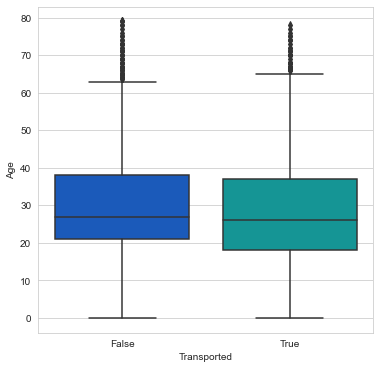

In [27]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Transported',y='Age',data=train,palette='winter')

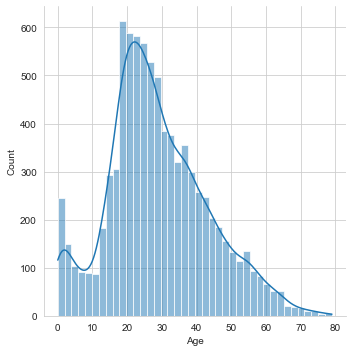

In [28]:
sns.displot(train['Age'].dropna(), kde=True, bins=40)

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

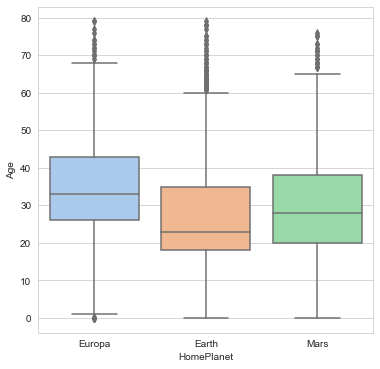

In [29]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='HomePlanet',y='Age',data=train,palette='pastel')

In [30]:
train_data = train_data.dropna(subset=['HomePlanet', 'Destination'])
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,ShoppingMall,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,25.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,0.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,371.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,151.0,True


In [31]:
len(train_data)

8314

In [32]:
### Data cleaning

In [99]:
# Dropping 'PassengerId', 'Name' and 'Cabin' columns.
train_df = train.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

# Dropping 'nan' in 'HomePlanet' and 'Destination' as we can't impute that data.
train_df = train_df.dropna(subset=['HomePlanet', 'Destination'])

train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8314 non-null   object 
 1   CryoSleep     8103 non-null   object 
 2   Destination   8314 non-null   object 
 3   Age           8140 non-null   float64
 4   VIP           8117 non-null   object 
 5   RoomService   8142 non-null   float64
 6   FoodCourt     8139 non-null   float64
 7   ShoppingMall  8118 non-null   float64
 8   Spa           8137 non-null   float64
 9   VRDeck        8129 non-null   float64
 10  Transported   8314 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 722.6+ KB


<AxesSubplot:xlabel='Transported', ylabel='count'>

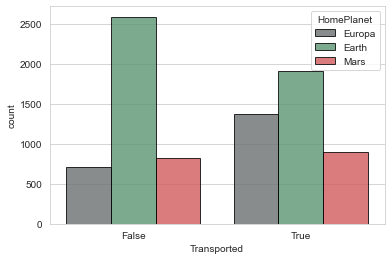

In [35]:
#sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='HomePlanet', data=train_df,
              palette=['#6B7071', '#519F71', '#E5464B'], alpha=0.8, edgecolor="black")

In [36]:
# Encoding the string value columns: 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'.
home = pd.get_dummies(train_df['HomePlanet'])
cryosleep = pd.get_dummies(train_df['CryoSleep'], prefix='Cryosleep', drop_first=True)
destination = pd.get_dummies(train_df['Destination'])#,drop_first=True)
vip = pd.get_dummies(train_df['VIP'], prefix='VIP', drop_first=True)
transported = pd.get_dummies(train_df['Transported'], prefix='Transported?', drop_first=True)

In [37]:
train_df = train_df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'], axis=1)

train_df = pd.concat([train_df, home, cryosleep, destination, vip, transported], axis=1)

In [38]:
train_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,Cryosleep_True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,VIP_True,Transported?_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,1,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,1,0,0,0,0


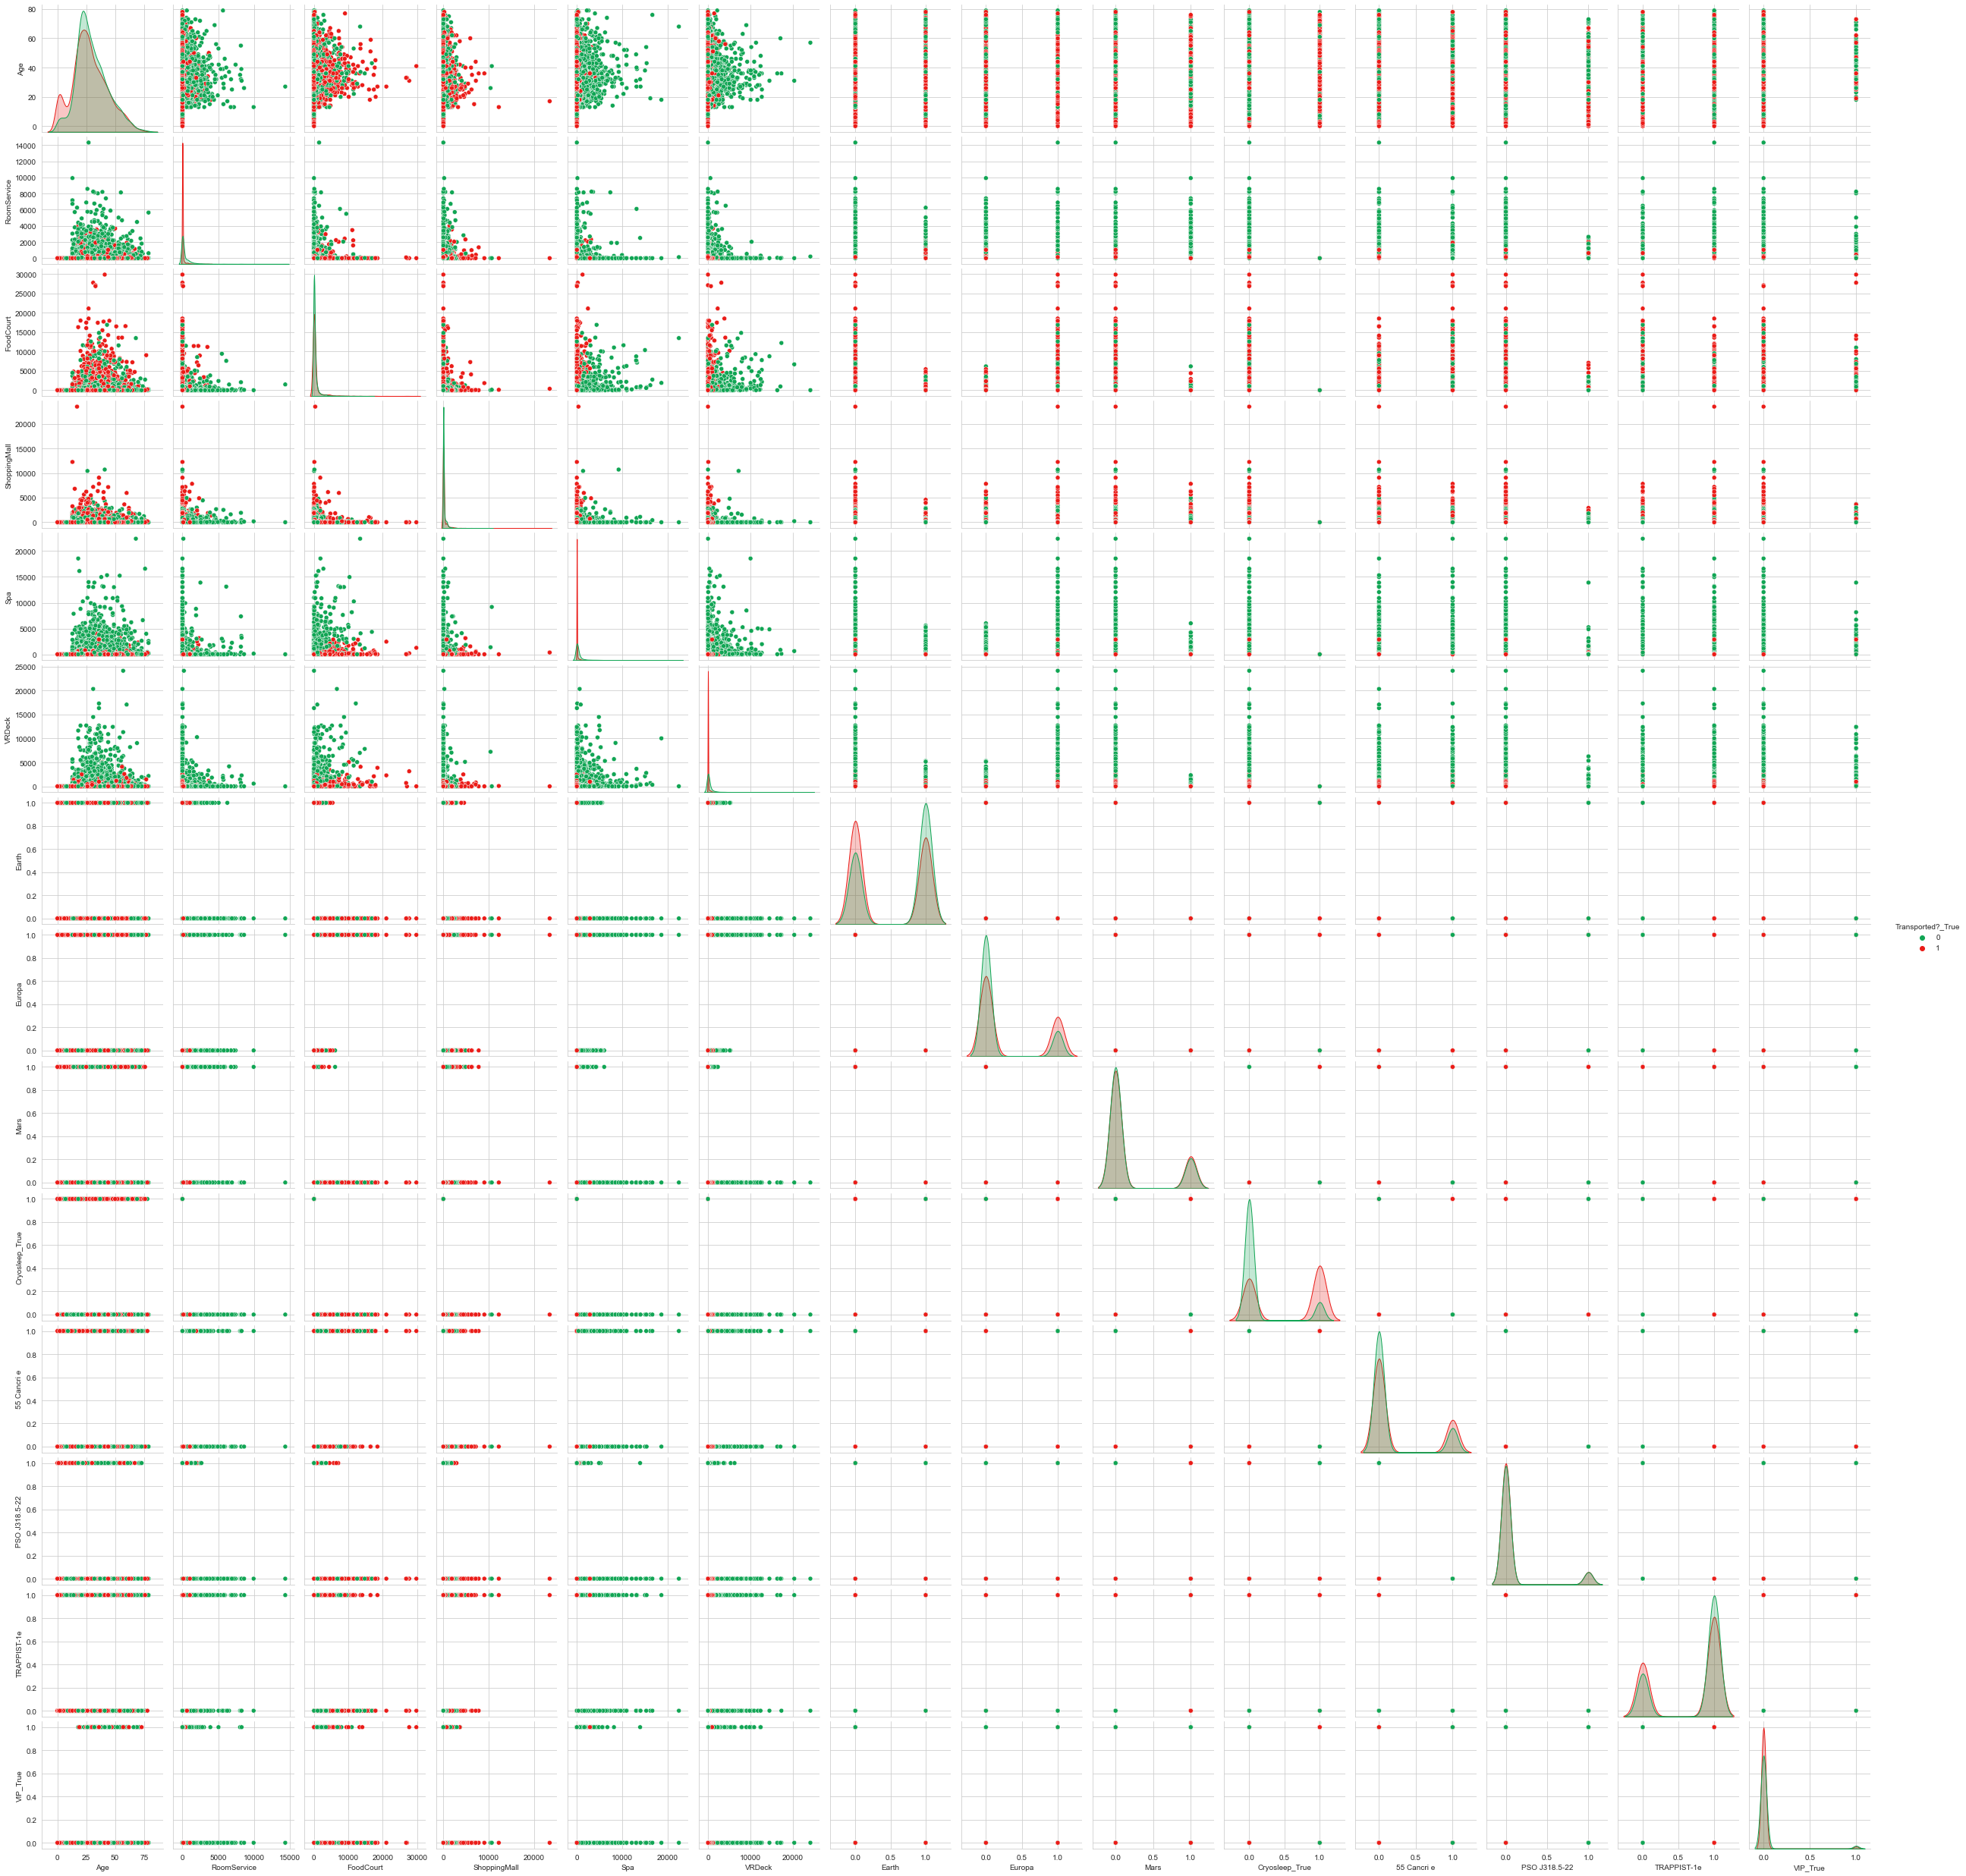

In [39]:
sns.pairplot(train_df, hue='Transported?_True', palette=['#11A554', '#EA1C18'])

# Red = Transported
# Green = Not Transported

In [40]:
train_df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Earth', 'Europa', 'Mars', 'Cryosleep_True', '55 Cancri e',
       'PSO J318.5-22', 'TRAPPIST-1e', 'VIP_True', 'Transported?_True'],
      dtype='object')

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8140 non-null   float64
 1   RoomService        8142 non-null   float64
 2   FoodCourt          8139 non-null   float64
 3   ShoppingMall       8118 non-null   float64
 4   Spa                8137 non-null   float64
 5   VRDeck             8129 non-null   float64
 6   Earth              8314 non-null   uint8  
 7   Europa             8314 non-null   uint8  
 8   Mars               8314 non-null   uint8  
 9   Cryosleep_True     8314 non-null   uint8  
 10  55 Cancri e        8314 non-null   uint8  
 11  PSO J318.5-22      8314 non-null   uint8  
 12  TRAPPIST-1e        8314 non-null   uint8  
 13  VIP_True           8314 non-null   uint8  
 14  Transported?_True  8314 non-null   uint8  
dtypes: float64(6), uint8(9)
memory usage: 785.8 KB


<AxesSubplot:>

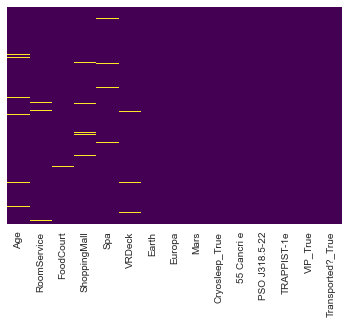

In [42]:
# Visualising missing data
sns.heatmap(train_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [43]:
#sns.heatmap(train_df.dropna().T.corr(), annot=True, cmap='flare', alpha=0.9, linecolor='black', linewidths = 0.05)

In [44]:
len(train_df.dropna())

7281

In [45]:
#sns.heatmap(train_df.drop(['FoodCourt', 'ShoppingMall'], axis=1).dropna().T.corr(), 
            #annot=True, cmap='flare', alpha=0.9, linecolor='black', linewidths = 0.05)

In [46]:
8+7

15

In [47]:
4-8

-4

In [ ]:
#sns.heatmap(train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].dropna().T.corr(), 
            annot=True, cmap='flare', alpha=0.9, linecolor='black', linewidths = 0.05)

In [54]:
train_df = train_df.dropna()

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Transported?_True',axis=1), 
                                                    train_df['Transported?_True'], test_size=0.30, 
                                                    random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1093
           1       0.77      0.80      0.79      1092

    accuracy                           0.78      2185
   macro avg       0.78      0.78      0.78      2185
weighted avg       0.78      0.78      0.78      2185



In [ ]:
'''# impute by modes based on 'HomePlanet' for RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

# Define the columns for imputation
columns_to_impute = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Group the data by 'HomePlanet' and calculate the mode for each column
modes = train_df.groupby('HomePlanet')[columns_to_impute].apply(lambda x: x.mode().iloc[0])

# Iterate over the columns to impute and fill missing values based on 'HomePlanet'
for column in columns_to_impute:
    train_df[column] = train_df[column].fillna(df['HomePlanet'].map(modes[column]))

# Print the updated dataframe
print(train_df)
'''

In [250]:
# Dropping 'PassengerId', 'Name' and 'Cabin' columns.
train_data = train.drop(['Name', 'Cabin'], axis=1)

# Dropping 'nan' in 'HomePlanet' and 'Destination' as we can't impute that data.
train_data = train_data.dropna(subset=['HomePlanet', 'Destination'])

train_df = train_data.drop('PassengerId', axis=1)

train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [291]:
len(train_df)

8314

In [251]:
'''# impute by mean based on HomePlanet for 'Age'

train_df['Age'] = train_df.groupby('HomePlanet')['Age'].transform(lambda x: x.fillna(x.mean()))
'''

"# impute by mean based on HomePlanet for 'Age'\n\ntrain_df['Age'] = train_df.groupby('HomePlanet')['Age'].transform(lambda x: x.fillna(x.mean()))\n"

In [252]:
# Function to impute by mean based on HomePlanet for 'Age'

def impute_mean_based_on_group(df, group_column, column_to_impute):
    df[column_to_impute] = df.groupby(group_column)[column_to_impute].transform(lambda x: x.fillna(x.mean()))
    return df

In [253]:
train_df = impute_mean_based_on_group(train_df, 'HomePlanet', 'Age')

In [254]:
len(train_df.Age[train_df.Age.isna()])

0

In [255]:
# Function to impute by modes based on 'HomePlanet' for RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

def impute_modes_based_on_group(df, group_column, columns_to_impute):
    modes = df.groupby(group_column)[columns_to_impute].apply(lambda x: x.mode().iloc[0])

    for column in columns_to_impute:
        df[column] = df[column].fillna(df[group_column].map(modes[column]))

    return df

In [256]:
columns_to_impute = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df = impute_modes_based_on_group(train_df, 'HomePlanet', columns_to_impute)

In [257]:
# Encoding the string value columns: 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'.
home = pd.get_dummies(train_df['HomePlanet'])
cryosleep = pd.get_dummies(train_df['CryoSleep'], prefix='Cryosleep', drop_first=True)
destination = pd.get_dummies(train_df['Destination'])#,drop_first=True)
vip = pd.get_dummies(train_df['VIP'], prefix='VIP', drop_first=True)
transported = pd.get_dummies(train_df['Transported'], prefix='Transported?', drop_first=True)

train_df = train_df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'], axis=1)

train_df = pd.concat([train_df, home, cryosleep, destination, vip, transported], axis=1)


In [258]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8314 non-null   float64
 1   RoomService        8314 non-null   float64
 2   FoodCourt          8314 non-null   float64
 3   ShoppingMall       8314 non-null   float64
 4   Spa                8314 non-null   float64
 5   VRDeck             8314 non-null   float64
 6   Earth              8314 non-null   uint8  
 7   Europa             8314 non-null   uint8  
 8   Mars               8314 non-null   uint8  
 9   Cryosleep_True     8314 non-null   uint8  
 10  55 Cancri e        8314 non-null   uint8  
 11  PSO J318.5-22      8314 non-null   uint8  
 12  TRAPPIST-1e        8314 non-null   uint8  
 13  VIP_True           8314 non-null   uint8  
 14  Transported?_True  8314 non-null   uint8  
dtypes: float64(6), uint8(9)
memory usage: 527.7 KB


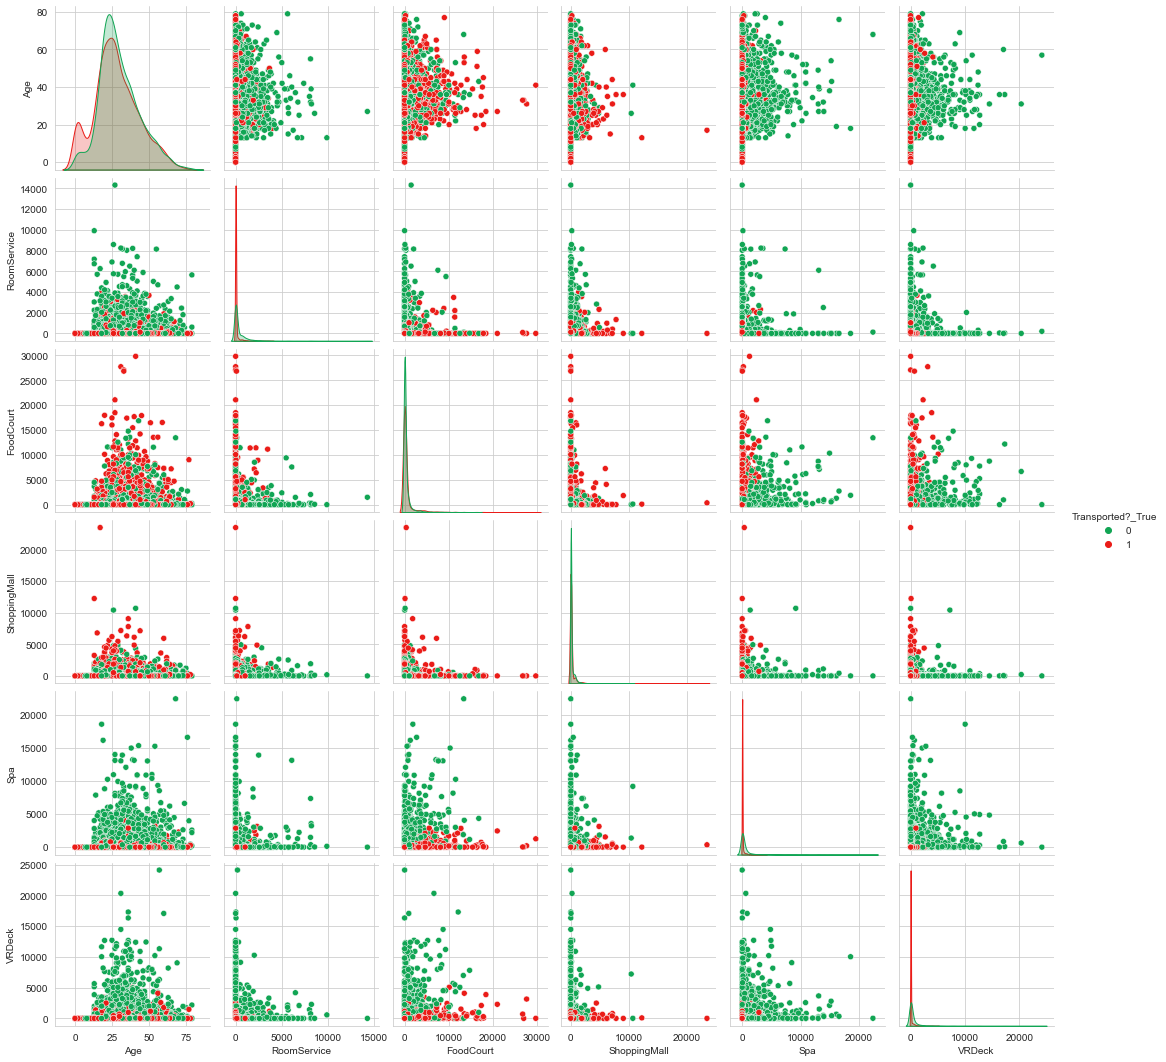

In [177]:
numeric_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported?_True']

sns.pairplot(train_df[numeric_col].dropna(), hue='Transported?_True' , palette=['#11A554', '#EA1C18'])

# Red = Transported
# Green = Not Transported

In [178]:
#sns.displot(train['Age'], color='green', label='train')
#sns.displot(train_df['Age'], color='blue', label='train_df')
#plt.legend()

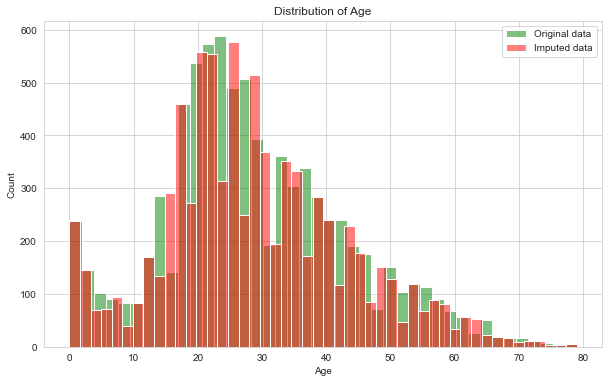

In [293]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], color='green', label='Original data', alpha=0.5)
sns.histplot(train_df['Age'], color='red', label='Imputed data', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [292]:
print(len(train_data['Age'].dropna()))
print(len(train_df['Age']))

8140
8314


In [185]:
#train_data['Age'].to_csv('age1.csv', index=False)

#train_df['Age'].to_csv('age2.csv', index=False)

<AxesSubplot:>

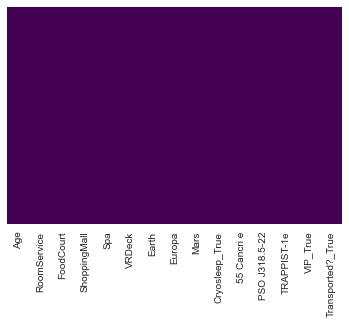

In [260]:
# Visualising missing data
sns.heatmap(train_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [261]:
for column in train_df.columns:
  print(f'\nMissing {column} values = {len(train_df[train_df[column].isna()])}')


Missing Age values = 0

Missing RoomService values = 0

Missing FoodCourt values = 0

Missing ShoppingMall values = 0

Missing Spa values = 0

Missing VRDeck values = 0

Missing Earth values = 0

Missing Europa values = 0

Missing Mars values = 0

Missing Cryosleep_True values = 0

Missing 55 Cancri e values = 0

Missing PSO J318.5-22 values = 0

Missing TRAPPIST-1e values = 0

Missing VIP_True values = 0

Missing Transported?_True values = 0


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Transported?_True',axis=1), 
                                                    train_df['Transported?_True'], test_size=0.25, 
                                                    random_state=101)


In [263]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1055
           1       0.78      0.81      0.79      1024

    accuracy                           0.79      2079
   macro avg       0.79      0.79      0.79      2079
weighted avg       0.79      0.79      0.79      2079



In [265]:
test = pd.read_csv('test.csv')

<AxesSubplot:>

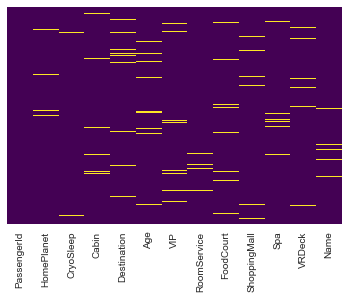

In [288]:
# Visualising missing data
sns.heatmap(test.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [266]:
test_df = test.drop(['Name', 'Cabin'], axis=1)

test_df = test_df.dropna(subset=['HomePlanet', 'Destination'])

home = pd.get_dummies(test_df['HomePlanet'])
cryosleep = pd.get_dummies(test_df['CryoSleep'], prefix='Cryosleep', drop_first=True)
destination = pd.get_dummies(test_df['Destination'])#,drop_first=True)
vip = pd.get_dummies(test_df['VIP'], prefix='VIP', drop_first=True) 

test_df = test_df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], axis=1)

test_df = pd.concat([test_df, home, cryosleep, destination, vip], axis=1) 

test_df = test_df.dropna()

In [267]:
test_predictions = logmodel.predict(test_df.drop(['PassengerId'], axis=1))

In [268]:
test_predictions

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [269]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data

accuracy = pipe.score(X_test, y_test)
print("Accuracy:", accuracy,'\n')

print(classification_report(y_test,predictions))

Accuracy: 0.796055796055796 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1055
           1       0.78      0.81      0.79      1024

    accuracy                           0.79      2079
   macro avg       0.79      0.79      0.79      2079
weighted avg       0.79      0.79      0.79      2079



In [287]:
result = {'PassengerId': np.array(test_df.PassengerId), 'Transported': test_predictions}
result_df = pd.DataFrame(result)
result_df.Transported = result_df.Transported.map({0:'False', 1:'True'})
result_df

result_df.to_csv('Logistic regression.csv', index=False)

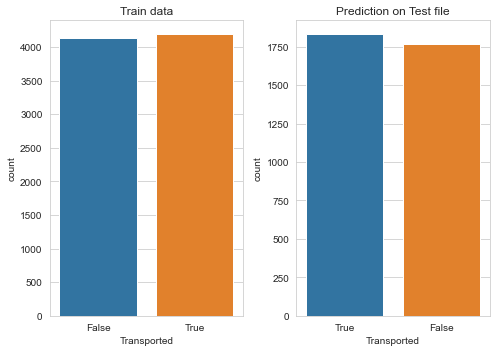

In [280]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

sns.countplot(x='Transported', data=train_data, ax=axs[0])
axs[0].set_title('Train data')

sns.countplot(x='Transported', data=result_df, ax=axs[1])
axs[1].set_title('Prediction on Test file')

plt.tight_layout()
plt.show()




In [241]:
### Random Forest

In [237]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [238]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [239]:
# Build the random forest model
RFfit = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
RFfit.fit(X_train_scaled, y_train)
y_pred = RFfit.predict(X_test_scaled)

In [240]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.13950147178441213
R-squared: 0.44187001915457536


In [281]:
test_predictions_rf = RFfit.predict(test_df.drop(['PassengerId'], axis=1))

In [286]:
test_predictions_rf.min()

0.050643115942028985

In [ ]:
result_rf = {'PassengerId': np.array(test_df.PassengerId), 'Transported': test_predictions_rf}
result_rf_df = pd.DataFrame(result_rf)

result_rf_df.Transported = result_df.Transported.map({0:'False', 1:'True'})
result_rf_df